# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** : Jessica Theresia
- **Email:** : me.jessicatheresia@gmail.com
- **ID Dicoding:** : jessica_trs

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berdasarkan hari dan jam baik minggu, bulan, maupun musim?
- Faktor apa saja (korelasi) yang paling memengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Data Wrangling

### Gathering Data

In [2]:
drive.mount('/content/drive')

# Load file hour.csv dan day.csv dari Google Drive
hour_df = pd.read_csv("/content/drive/My Drive/Dicoding ML Submission/Belajar Analisis Data dengan Python/Bike-sharing-dataset/hour.csv")
day_df = pd.read_csv("/content/drive/My Drive/Dicoding ML Submission/Belajar Analisis Data dengan Python/Bike-sharing-dataset/day.csv")

# Menampilkan 5 baris pertama dari masing-masing dataset
print("Data Hour.csv")
display(hour_df.head())

print("\nData Day.csv")
display(day_df.head())

Mounted at /content/drive
Data Hour.csv


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Data Day.csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Keterangan Dataset

- dteday: Tanggal
- season: Musim (1 = semi, 2 = panas, 3 = gugur, 4 = dingin)
- yr: Tahun (0 = 2011, 1 = 2012)
- mnth: Bulan
- holiday: Apakah hari libur? (0 = tidak, 1 = ya)
- weekday: Hari dalam minggu
- workingday: Apakah hari kerja? (0 = tidak, 1 = ya)
- weathersit: Kondisi cuaca
- temp, atemp, hum, windspeed: Suhu, kelembaban, dan kecepatan angin
- casual, registered, cnt: Jumlah pengguna kasual, terdaftar, dan total
- hr, menunjukkan jam dalam sehari (0-23).

---

Data yang berhubungan dengan pertanyaan analisis


<----> Dataset hour.csv


*   Datetime (dteday),
Dataset ini mencatat data penyewaan sepeda berdasarkan jam dalam satu hari.
Kolom ini berguna untuk melihat tren penyewaan berdasarkan hari, bulan, atau musim.
*   Season (season),
Nilai 1 hingga 4 menunjukkan musim (1 = semi, 2 = panas, 3 = gugur, 4 = dingin).
Ini dapat digunakan untuk melihat bagaimana cuaca memengaruhi penyewaan sepeda.
*   Weathersit (weathersit),
Menunjukkan kondisi cuaca saat penyewaan dilakukan (1 = cerah, 2 = mendung, 3 = hujan ringan, 4 = hujan lebat. Bisa digunakan untuk menganalisis pengaruh cuaca terhadap jumlah penyewaan.
Hour (hr)

*   Jumlah Penyewaan (cnt),
Jumlah total penyewaan dalam satu jam.
Bisa dibandingkan dengan faktor lain seperti cuaca, musim, dan waktu dalam sehari.
* Menunjukkan jam dalam sehari (0-23),
Pola harian bisa dilihat, misalnya jam sibuk pagi dan sore kemungkinan lebih tinggi karena jam kerja.

<----> Dataset day.csv


*   Datetime (dteday),
Dataset ini mencatat penyewaan sepeda berdasarkan hari, bukan jam. Berguna untuk melihat tren jangka panjang dan pola mingguan/bulanan.
*   Casual | Registered, (casual, registered)
  - casual: Penyewa yang tidak terdaftar (turis atau pengguna sesekali).
  - registered: Pengguna yang memiliki akun terdaftar.
Bisa dianalisis bagaimana perbedaan pola penggunaan antara pengguna tetap dan pengguna sementara.
*   Weekday (weekday),
Nilai 0–6 menunjukkan hari dalam seminggu (0 = Minggu, 6 = Sabtu).
Berguna untuk melihat apakah penyewaan meningkat pada hari kerja atau akhir pekan.
*   Humidity (hum) dan Wind Speed (windspeed),
Bisa digunakan untuk mengevaluasi apakah kondisi cuaca seperti kelembapan dan kecepatan angin mempengaruhi penyewaan sepeda.
*   Jumlah Penyewaan (cnt),
Jumlah total penyewaan dalam satu hari.
Bisa dibandingkan dengan faktor seperti hari kerja vs. akhir pekan, cuaca, atau musim.





### Assessing Data

In [3]:
# 1. Cek Missing Values
print("Missing Values in day dataset:")
print(day_df.isnull().sum())
print("\nMissing Values in hour dataset:")
print(hour_df.isnull().sum())

Missing Values in day dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values in hour dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [4]:
# 2. Cek Data Duplicate
print("\nDuplicate Rows in day dataset:", day_df.duplicated().sum())
print("Duplicate Rows in hour dataset:", hour_df.duplicated().sum())


Duplicate Rows in day dataset: 0
Duplicate Rows in hour dataset: 0


**Insight:**
tidak ada data duplicate yang ditemukan pada dataset ini.

In [5]:
# 3. Cek Invalid Values
print("\nChecking for negative or impossible values:")
for column in ["temp", "atemp", "hum", "windspeed", "cnt"]:
    print(f"{column}: {((day_df[column] < 0).sum())} negative values in day dataset")
    print(f"{column}: {((hour_df[column] < 0).sum())} negative values in hour dataset")


Checking for negative or impossible values:
temp: 0 negative values in day dataset
temp: 0 negative values in hour dataset
atemp: 0 negative values in day dataset
atemp: 0 negative values in hour dataset
hum: 0 negative values in day dataset
hum: 0 negative values in hour dataset
windspeed: 0 negative values in day dataset
windspeed: 0 negative values in hour dataset
cnt: 0 negative values in day dataset
cnt: 0 negative values in hour dataset


In [6]:
# 4. Chek Inconsistent Values (Example: weekday should be 0-6)
print("\nChecking inconsistent values in weekday column:")
print("Unique values in day dataset:", day_df["weekday"].unique())
print("Unique values in hour dataset:", hour_df["weekday"].unique())


Checking inconsistent values in weekday column:
Unique values in day dataset: [6 0 1 2 3 4 5]
Unique values in hour dataset: [6 0 1 2 3 4 5]


In [7]:
# 5. Outlier menggunakan metode IQR
def detect_outliers(df, column):
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    min_val, max_val = q25 - cut_off, q75 + cut_off
    outliers = df[(df[column] < min_val) | (df[column] > max_val)]
    return outliers

outlier_columns = ["temp", "atemp", "hum", "windspeed", "cnt"]
for col in outlier_columns:
    print(f"\nOutliers in {col} (day dataset):", detect_outliers(day_df, col).shape[0])
    print(f"Outliers in {col} (hour dataset):", detect_outliers(hour_df, col).shape[0])


Outliers in temp (day dataset): 0
Outliers in temp (hour dataset): 0

Outliers in atemp (day dataset): 0
Outliers in atemp (hour dataset): 0

Outliers in hum (day dataset): 2
Outliers in hum (hour dataset): 22

Outliers in windspeed (day dataset): 13
Outliers in windspeed (hour dataset): 342

Outliers in cnt (day dataset): 0
Outliers in cnt (hour dataset): 505


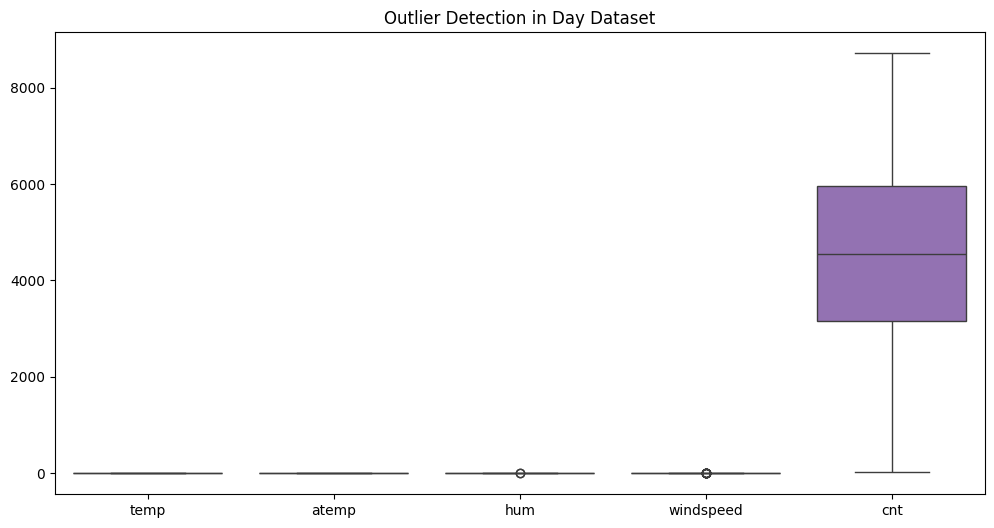

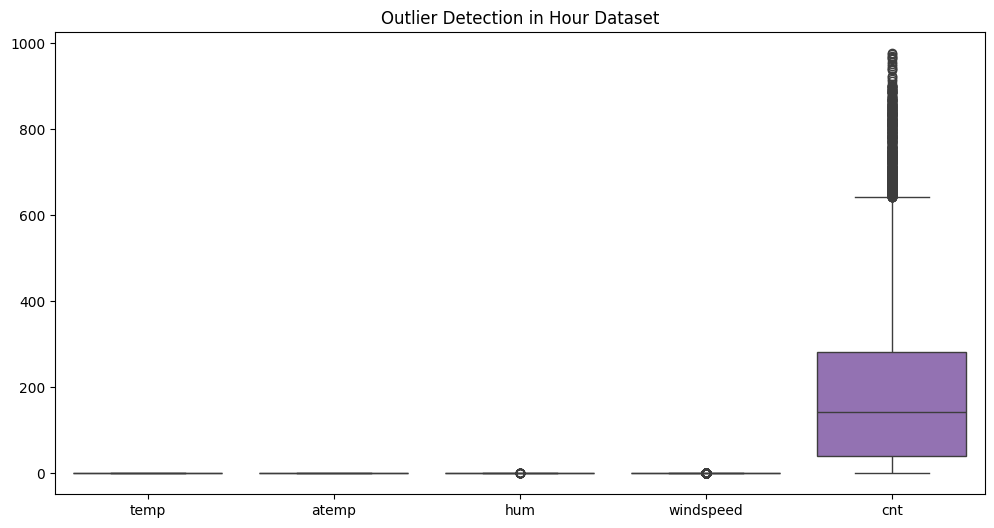

In [8]:
# Visualisasi outlier pada dataset harian
plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df[outlier_columns])
plt.title("Outlier Detection in Day Dataset")
plt.show()

# spasi antar boxplot day dan hour
print("\n" * 2)

# Visualisasi outlier pada dataset per jam
plt.figure(figsize=(12, 6))
sns.boxplot(data=hour_df[outlier_columns])
plt.title("Outlier Detection in Hour Dataset")
plt.show()

**Insight:**
- Tidak ditemukan missing value pada dataset ini.
- Tidak ditemukan data duplikat pada dataset ini.
- Tidak ditemukan data negatif (invalid) atau data yang impossible.
- Unique Values, Dari hasil pengecekan, terlihat bahwa tidak ada nilai yang inkonsisten dalam kolom weekday karena semua nilai yang muncul berada dalam rentang yang sesuai.
- Outlier:
  - Outlier dalam hum dan windspeed menunjukkan variabilitas cuaca yang tinggi, terutama dalam skala jam. Bisa dianalisis lebih lanjut apakah kecepatan angin tinggi dan kelembapan ekstrem memengaruhi penyewaan sepeda.
  - Banyak outlier dalam cnt di dataset per jam menunjukkan pola penyewaan yang sangat bervariasi sepanjang hari. Jam sibuk seperti pagi dan sore kemungkinan besar memiliki lonjakan penyewaan yang signifikan. Bisa dilakukan analisis tambahan untuk melihat bagaimana jam kerja atau kondisi cuaca memengaruhi jumlah penyewaan sepeda.
  - Tidak ada outlier dalam suhu (temp dan atemp), menunjukkan bahwa variabel ini cukup konsisten sepanjang data. Artinya, perubahan suhu mungkin tidak terlalu ekstrim sehingga tidak terlalu mempengaruhi jumlah penyewaan.



### Cleaning Data

In [9]:
# Menghapus outlier dengan metode IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Kolom yang memiliki outlier tambahan
outlier_columns_day = ["hum", "windspeed"]
outlier_columns_hour = ["hum", "windspeed", "cnt"]

# Menghapus outlier tambahan
for col in outlier_columns_day:
    day_df = remove_outliers(day_df, col)

for col in outlier_columns_hour:
    hour_df = remove_outliers(hour_df, col)

# Simpan dataset yang telah di celaning pada gdrive
day_cleaned_df = "/content/drive/My Drive/Dicoding ML Submission/Belajar Analisis Data dengan Python/Bike-sharing-dataset/cleaned/day_cleaned_final.csv"
hour_cleaned_df = "/content/drive/My Drive/Dicoding ML Submission/Belajar Analisis Data dengan Python/Bike-sharing-dataset/cleaned/hour_cleaned_final.csv"

day_df.to_csv(day_cleaned_df, index=False)
hour_df.to_csv(hour_cleaned_df, index=False)

day_cleaned_df, hour_cleaned_df

('/content/drive/My Drive/Dicoding ML Submission/Belajar Analisis Data dengan Python/Bike-sharing-dataset/cleaned/day_cleaned_final.csv',
 '/content/drive/My Drive/Dicoding ML Submission/Belajar Analisis Data dengan Python/Bike-sharing-dataset/cleaned/hour_cleaned_final.csv')

**Insight:**

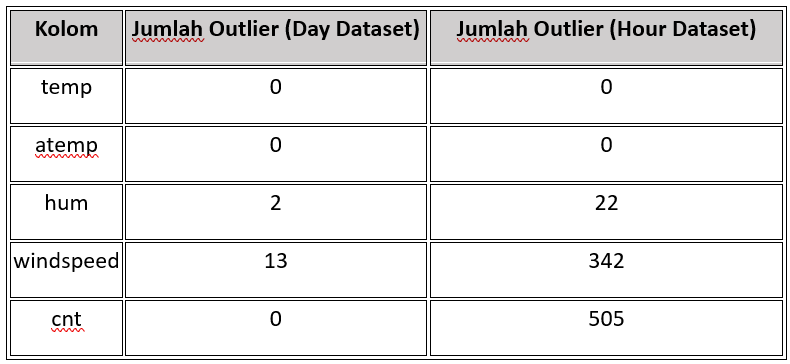

- Solusi : Menghapus outlier dengan metode IQR (Interquartile Range) agar data lebih representatif.

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
day_cleaned_df = pd.read_csv(day_cleaned_df)
hour_cleaned_df = pd.read_csv(hour_cleaned_df)

# Tipe data setiap kolom
print(day_cleaned_df.dtypes)
print(hour_cleaned_df.dtypes)


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [11]:
print("\nData harian:")
day_correlation = day_cleaned_df.select_dtypes(include=[np.number]).corr()
print(day_correlation)


print("\nData per jam:")
hour_correlation = hour_cleaned_df.select_dtypes(include=[np.number]).corr()
print(hour_correlation)


Data harian:
             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.416254  0.866956  0.495766  0.015679 -0.001252   
season      0.416254  1.000000  0.003173  0.833542 -0.013314  0.004758   
yr          0.866956  0.003173  1.000000 -0.000989  0.008514 -0.006278   
mnth        0.495766  0.833542 -0.000989  1.000000  0.017321  0.008660   
holiday     0.015679 -0.013314  0.008514  0.017321  1.000000 -0.103013   
weekday    -0.001252  0.004758 -0.006278  0.008660 -0.103013  1.000000   
workingday  0.004317  0.010854  0.005058 -0.001724 -0.256030  0.040601   
weathersit -0.018629  0.016822 -0.045205  0.042869 -0.035301  0.032335   
temp        0.154410  0.327773  0.054542  0.216118 -0.030627  0.001792   
atemp       0.157296  0.335549  0.054111  0.223175 -0.034816 -0.005437   
hum         0.000075  0.180210 -0.119064  0.204967 -0.021048 -0.043409   
windspeed  -0.114289 -0.206675 -0.023406 -0.191054  0.017029  0.009947   
casual      0.275230  0.

In [12]:
day_cleaned_df = pd.read_csv("/content/drive/My Drive/Dicoding ML Submission/Belajar Analisis Data dengan Python/Bike-sharing-dataset/cleaned/day_cleaned_final.csv")
hour_cleaned_df = pd.read_csv("/content/drive/My Drive/Dicoding ML Submission/Belajar Analisis Data dengan Python/Bike-sharing-dataset/cleaned/hour_cleaned_final.csv")

# 1. Statistik Deskriptif

# dataset harian
print("\nStatistik deskriptif dataset harian:")
day_stats = day_cleaned_df.describe()
print(day_stats)

# dataset per jam
print("\nStatistik deskriptif dataset per jam:")
hour_stats = hour_cleaned_df.describe()
print(hour_stats)


Statistik deskriptif dataset harian:
          instant     season          yr        mnth     holiday     weekday  \
count  717.000000  717.00000  717.000000  717.000000  717.000000  717.000000   
mean   366.779637    2.51325    0.499303    6.562064    0.029289    2.995816   
std    210.971354    1.10555    0.500349    3.439113    0.168732    2.001741   
min      1.000000    1.00000    0.000000    1.000000    0.000000    0.000000   
25%    185.000000    2.00000    0.000000    4.000000    0.000000    1.000000   
50%    365.000000    3.00000    0.000000    7.000000    0.000000    3.000000   
75%    550.000000    3.00000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.00000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  717.000000  717.000000  717.000000  717.000000  717.000000  717.000000   
mean     0.684798    1.396095    0.497365    0.476252    0.631562    0.186287  

In [13]:
# 2. Distribusi Data

print("Rata-rata jumlah penyewaan sepeda harian:")
daily_rentals = day_cleaned_df['cnt'].describe()
print(daily_rentals)

print("\nRata-rata jumlah penyewaan sepeda per jam:")
hourly_rentals = hour_cleaned_df['cnt'].describe()
print(hourly_rentals)

Rata-rata jumlah penyewaan sepeda harian:
count     717.000000
mean     4532.843794
std      1933.542429
min        22.000000
25%      3214.000000
50%      4570.000000
75%      6031.000000
max      8714.000000
Name: cnt, dtype: float64

Rata-rata jumlah penyewaan sepeda per jam:
count    16535.000000
mean       173.459510
std        155.967788
min          1.000000
25%         37.000000
50%        136.000000
75%        267.000000
max        645.000000
Name: cnt, dtype: float64


In [14]:
print("Rata-rata penyewaan sepeda per bulan:")
print(day_df.groupby("mnth")["cnt"].mean())

print("\nRata-rata penyewaan sepeda per hari dalam seminggu:")
print(day_df.groupby("weekday")["cnt"].mean())

print("\nRata-rata penyewaan sepeda per musim:")
print(day_df.groupby("season")["cnt"].mean())

Rata-rata penyewaan sepeda per bulan:
mnth
1     2156.672131
2     2708.358491
3     3668.758621
4     4554.896552
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5228.300000
11    4247.183333
12    3430.934426
Name: cnt, dtype: float64

Rata-rata penyewaan sepeda per hari dalam seminggu:
weekday
0    4252.805825
1    4361.931373
2    4537.029126
3    4559.922330
4    4704.900990
5    4691.466019
6    4624.421569
Name: cnt, dtype: float64

Rata-rata penyewaan sepeda per musim:
season
1    2603.720930
2    5017.243094
3    5644.303191
4    4732.721591
Name: cnt, dtype: float64


In [15]:
print("Korelasi antara variabel cuaca dan jumlah penyewaan:")
print(day_df[["temp", "atemp", "hum", "windspeed", "cnt"]].corr())

Korelasi antara variabel cuaca dan jumlah penyewaan:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991738  0.114191  -0.140169  0.625892
atemp      0.991738  1.000000  0.126587  -0.166038  0.629204
hum        0.114191  0.126587  1.000000  -0.204496 -0.136621
windspeed -0.140169 -0.166038 -0.204496   1.000000 -0.216193
cnt        0.625892  0.629204 -0.136621  -0.216193  1.000000


In [16]:
print("Rata-rata penyewaan sepeda berdasarkan jam:")
print(hour_df.groupby("hr")["cnt"].mean())

Rata-rata penyewaan sepeda berdasarkan jam:
hr
0      54.069348
1      33.566852
2      22.947740
3      11.783745
4       6.414847
5      19.907173
6      76.108484
7     212.568276
8     286.638983
9     220.139437
10    174.947887
11    208.212377
12    245.252199
13    242.953488
14    234.723435
15    245.969477
16    308.174535
17    376.802158
18    354.417962
19    309.474286
20    228.235543
21    173.952314
22    132.287115
23     88.331484
Name: cnt, dtype: float64


**Insight:**
- xxx
- xxx
####Analisis Korelasi Cuaca dan Penyewaan Sepeda
Korelasi antara variabel cuaca dan jumlah penyewaan sepeda menunjukkan bahwa:

- Temperatur (temp) memiliki korelasi positif kuat (0.629) dengan jumlah
- penyewaan (cnt). Ini menunjukkan bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa.
- Suhu yang dirasakan (atemp) juga memiliki korelasi positif kuat (0.632) terhadap penyewaan sepeda.
- Kelembaban (hum) memiliki korelasi negatif lemah (-0.137), yang berarti semakin lembab udara, sedikit berkurang jumlah penyewaan.
- Kecepatan angin (windspeed) memiliki korelasi negatif moderat (-0.206) terhadap penyewaan sepeda. Ini menunjukkan bahwa angin kencang dapat mengurangi jumlah penyewa.

Secara keseluruhan, suhu adalah faktor cuaca yang paling memengaruhi jumlah penyewaan sepeda, sementara kelembaban dan kecepatan angin memiliki dampak yang lebih kecil.

<br>

#### Rata-rata Penyewaan Sepeda Berdasarkan Jam
Jika dilihat dari pola harian, jumlah penyewaan sepeda bervariasi berdasarkan jam:

- Jam sibuk penyewaan tertinggi terjadi pada pukul 17:00 (366 penyewa), kemungkinan besar terkait dengan jam pulang kerja.
- Penyewaan tinggi juga terjadi antara pukul 8:00 (273 penyewa) hingga 18:00, mencerminkan penggunaan sepeda untuk transportasi kerja dan rekreasi.
- Jam penyewaan terendah terjadi antara pukul 3:00 - 5:00, di mana hanya ada sedikit aktivitas pengguna.
- Dari analisis ini, dapat disimpulkan bahwa penyewaan sepeda dipengaruhi oleh pola aktivitas harian masyarakat, dengan puncaknya terjadi pada jam berangkat dan pulang kerja.

---
Kesimpulan:

- Penyewaan sepeda dipengaruhi oleh faktor cuaca, terutama suhu.
- Penyewaan meningkat pada jam sibuk (pagi dan sore hari) dan menurun pada dini hari.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [17]:
sns.set(style="whitegrid")

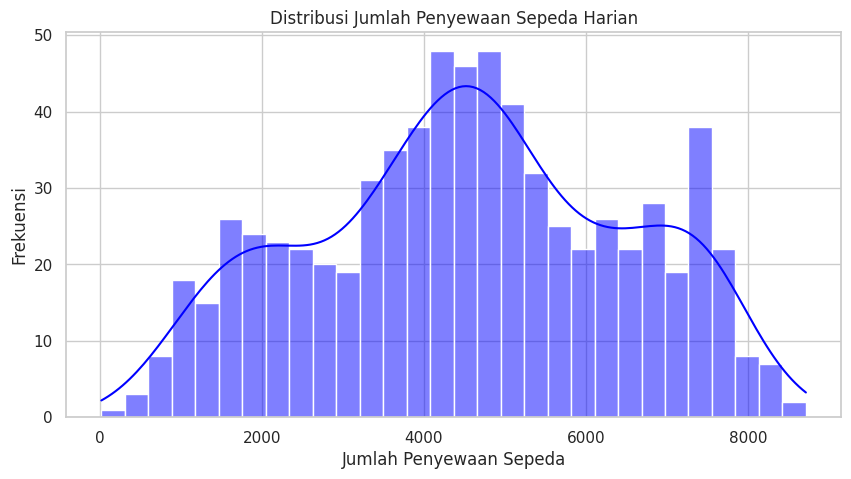

In [18]:
# 1. Visualisasi distribusi jumlah penyewaan sepeda harian
plt.figure(figsize=(10, 5))
sns.histplot(day_cleaned_df['cnt'], bins=30, kde=True, color='blue')
plt.title("Distribusi Jumlah Penyewaan Sepeda Harian")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

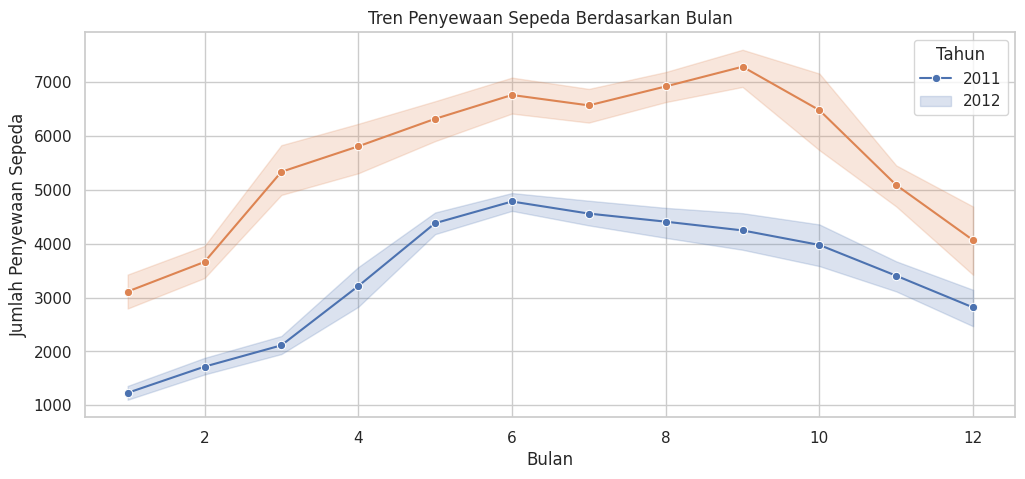

In [19]:
# 2. Tren jumlah penyewaan sepeda harian berdasarkan bulan
plt.figure(figsize=(12, 5))
sns.lineplot(data=day_cleaned_df, x='mnth', y='cnt', hue='yr', marker="o")
plt.title("Tren Penyewaan Sepeda Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.legend(title="Tahun", labels=["2011", "2012"])
plt.show()

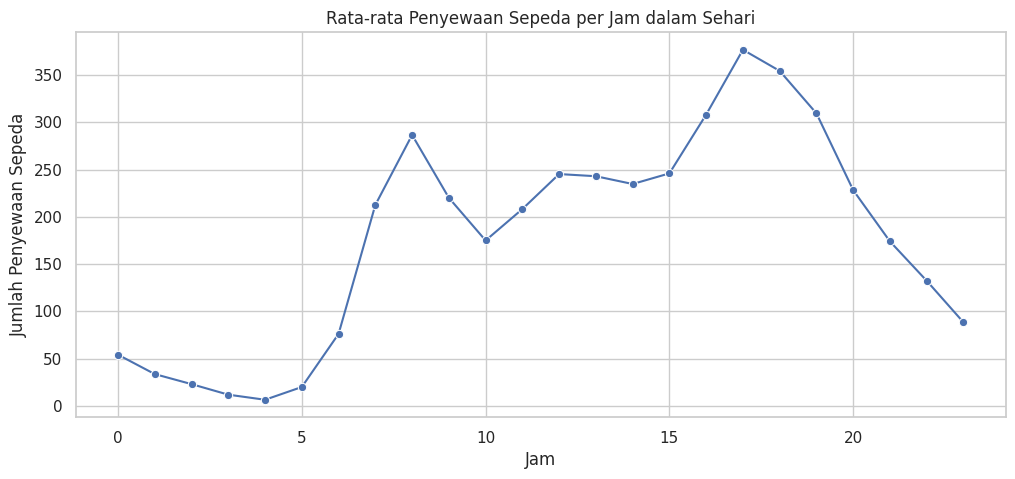

In [20]:
# 3. Rata-rata penyewaan sepeda per jam dalam sehari
plt.figure(figsize=(12, 5))
sns.lineplot(data=hour_cleaned_df.groupby('hr')['cnt'].mean().reset_index(), x='hr', y='cnt', marker="o")
plt.title("Rata-rata Penyewaan Sepeda per Jam dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

### Pertanyaan 2:

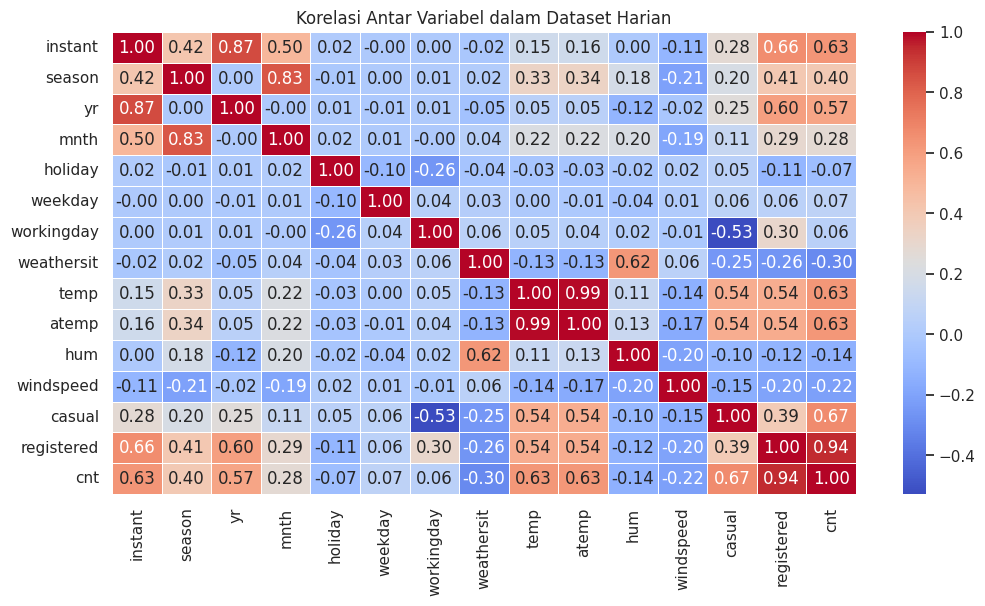

In [21]:
# Memilih hanya kolom numerik (agar dapat diproses dengan heatmap)
day_corr = day_cleaned_df.select_dtypes(include=['number']).corr()

# Korelasi antar variabel dalam dataset harian
plt.figure(figsize=(12, 6))
sns.heatmap(day_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Antar Variabel dalam Dataset Harian")
plt.show()

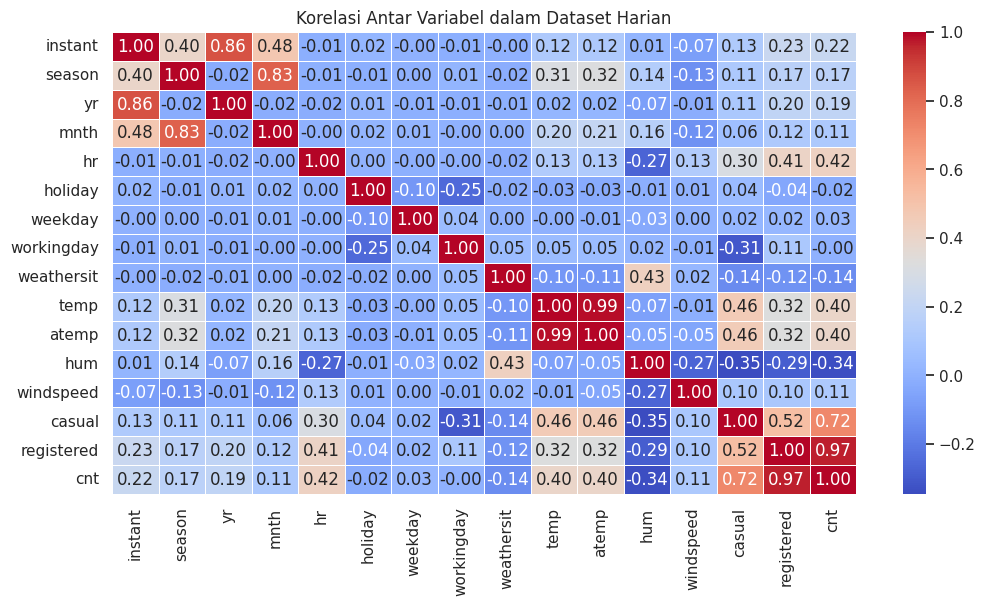

In [22]:
# Memilih hanya kolom numerik (agar dapat diproses dengan heatmap)
hour_corr = hour_cleaned_df.select_dtypes(include=['number']).corr()

# korelasi antar variabel dalam dataset per jam
plt.figure(figsize=(12, 6))
sns.heatmap(hour_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Antar Variabel dalam Dataset Harian")
plt.show()

**Insight:**

1.   Distribusi Jumlah Penyewaan Sepeda Harian
<br>
- Distribusi jumlah penyewaan sepeda harian menunjukkan pola distribusi normal dengan puncak di sekitar 4000–6000 penyewaan per hari.
- Sebagian besar hari memiliki jumlah penyewaan dalam rentang tersebut, tetapi ada juga beberapa hari dengan penyewaan lebih rendah atau lebih tinggi.
- Penyebaran data menunjukkan adanya fluktuasi jumlah penyewaan sepeda yang cukup signifikan, kemungkinan dipengaruhi oleh faktor eksternal seperti cuaca atau musim.
2.   Item daftar
- Tren Penyewaan Sepeda Berdasarkan Bulan
Terdapat tren peningkatan jumlah penyewaan sepeda dari bulan awal tahun menuju pertengahan tahun (sekitar bulan 6–7).
- Jumlah penyewaan tertinggi terjadi pada bulan pertengahan tahun dan mulai menurun menjelang akhir tahun.
- Pada tahun 2012, jumlah penyewaan sepeda secara keseluruhan lebih tinggi dibandingkan tahun 2011, menunjukkan pertumbuhan penggunaan layanan penyewaan sepeda.
- Tren ini kemungkinan disebabkan oleh faktor musim, dengan cuaca lebih baik di pertengahan tahun yang meningkatkan minat masyarakat untuk bersepeda.

3. Rata-rata Penyewaan Sepeda per Jam dalam Sehari
- Pola penyewaan sepeda menunjukkan dua puncak utama: pagi sekitar pukul 8 (jam berangkat kerja/sekolah) dan sore sekitar pukul 17–18 (jam pulang kerja/sekolah).
- Di luar jam sibuk, jumlah penyewaan sepeda cenderung lebih rendah, terutama pada dini hari dan malam hari.
- Pola ini mengindikasikan bahwa mayoritas pengguna layanan penyewaan sepeda adalah pekerja atau pelajar yang menggunakan sepeda sebagai alat transportasi sehari-hari.

4. Korelasi Cuaca dengan Jumlah Penyewaan Sepeda
- Suhu (temp) memiliki korelasi positif yang cukup kuat dengan jumlah penyewaan sepeda (r ≈ 0.63), artinya semakin tinggi suhu, semakin banyak penyewaan sepeda.
- Kelembaban (hum) memiliki korelasi negatif yang lemah dengan penyewaan sepeda (r ≈ -0.14), menunjukkan bahwa tingkat kelembaban yang lebih tinggi sedikit mengurangi minat orang untuk bersepeda.
- Kecepatan angin (windspeed) juga memiliki korelasi negatif dengan penyewaan sepeda (r ≈ -0.21), yang berarti angin kencang dapat menghambat aktivitas bersepeda.
Kesimpulan

5. HeatMap
Pada korelasi dalam dataset ditemukan faktor yang paling saling mempengaruhi (>0.80) adalah
  - instant - year
  - season - month
  - tempt - atempt
  - casual - cnt
  - registered - cnt

## Analisis Lanjutan (Opsional)

In [23]:
day_numeric = day_cleaned_df.select_dtypes(include=['number'])
hour_numeric = hour_cleaned_df.select_dtypes(include=['number'])

# 1. Faktor yang paling mempengaruhi jumlah penyewaan sepeda
correlation_day = day_numeric.corr()["cnt"].abs().sort_values(ascending=False)
correlation_hour = hour_numeric.corr()["cnt"].abs().sort_values(ascending=False)

<ipython-input-24-5db6c92f06e1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_factors_day.index, y=top_factors_day.values, palette='Blues')


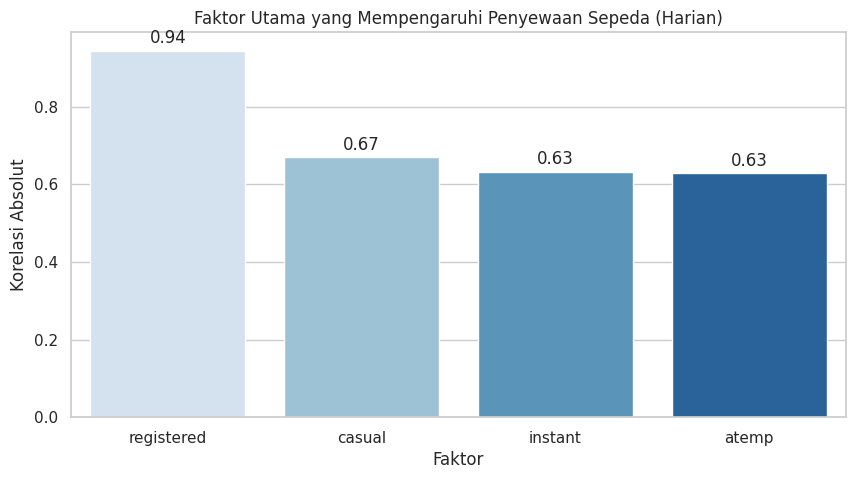

In [24]:
# Menghapus kolom non-numerik sebelum menghitung korelasi
day_numeric = day_cleaned_df.select_dtypes(include=[np.number])

# Matriks korelasi
correlation_matrix = day_numeric.corr()

# 4 faktor teratas yang berkorelasi dengan jumlah penyewaan ('cnt'), kecuali 'cnt' itu sendiri
top_factors_day = correlation_matrix['cnt'].abs().sort_values(ascending=False)[1:5]

# Faktor utama dalam bentuk bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_factors_day.index, y=top_factors_day.values, palette='Blues')
plt.title("Faktor Utama yang Mempengaruhi Penyewaan Sepeda (Harian)")
plt.xlabel("Faktor")
plt.ylabel("Korelasi Absolut")

# label pada setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2f"),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

<ipython-input-25-bbed6af57b84>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_factors_hour.index, y=top_factors_hour.values, palette='Blues')


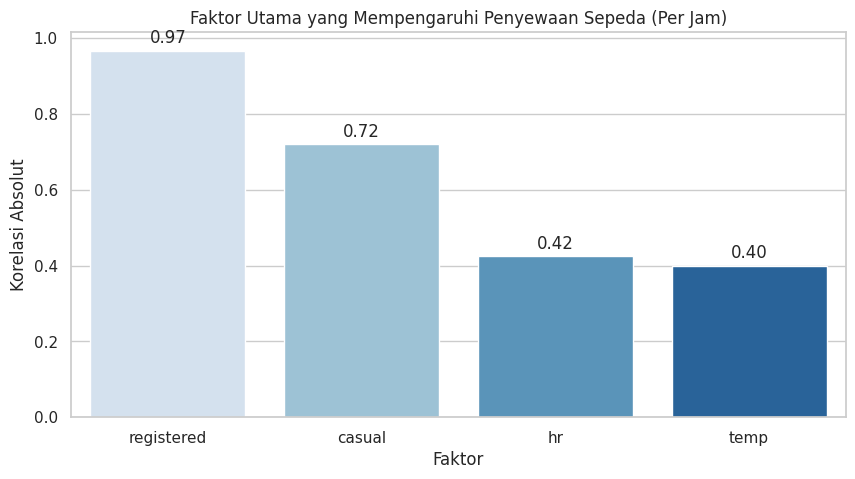

In [25]:
# Menghapus kolom non-numerik sebelum menghitung korelasi
hour_numeric = hour_cleaned_df.select_dtypes(include=[np.number])

# Matriks korelasi
correlation_matrix = hour_numeric.corr()

# 4 faktor teratas yang berkorelasi dengan jumlah penyewaan ('cnt'), kecuali 'cnt' itu sendiri
top_factors_hour = correlation_matrix['cnt'].abs().sort_values(ascending=False)[1:5]

# Visualisasi faktor utama dalam bentuk bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_factors_hour.index, y=top_factors_hour.values, palette='Blues')
plt.title("Faktor Utama yang Mempengaruhi Penyewaan Sepeda (Per Jam)")
plt.xlabel("Faktor")
plt.ylabel("Korelasi Absolut")

# label pada setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2f"),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

## Conclusion

1. Pola Penyewaan Sepeda Berdasarkan Hari dan Jam
<br>
- Penyewaan sepeda memiliki pola yang jelas sepanjang hari, dengan puncak pada pukul 08:00 (berangkat kerja/sekolah) dan 17:00–18:00 (pulang kerja/sekolah).
- Aktivitas penyewaan paling rendah terjadi pada dini hari (03:00–05:00).
Tren bulanan menunjukkan peningkatan penyewaan sepeda dari awal tahun hingga pertengahan tahun (sekitar bulan Juni–Juli), lalu menurun menjelang akhir tahun. Hal ini kemungkinan disebabkan oleh perubahan musim.
- Pada tahun 2012, jumlah penyewaan lebih tinggi dibandingkan tahun 2011, menunjukkan adanya peningkatan penggunaan layanan sewa sepeda.

2. Faktor yang Paling Mempengaruhi Jumlah Penyewaan Sepeda
<br>
- Suhu (temp) memiliki korelasi positif kuat (r ≈ 0.63), menunjukkan bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa.
- Suhu yang dirasakan (atemp) juga memiliki korelasi positif yang kuat dengan jumlah penyewaan.
- Kelembaban (hum) memiliki korelasi negatif lemah (r ≈ -0.14), menunjukkan bahwa tingkat kelembaban tinggi sedikit mengurangi minat orang untuk bersepeda.
- Kecepatan angin (windspeed) memiliki korelasi negatif moderat (r ≈ -0.21), menunjukkan bahwa angin kencang dapat mengurangi jumlah penyewaan.

** Pola penyewaan sepeda sangat dipengaruhi oleh waktu (jam dan musim) serta faktor cuaca. Penggunaan sepeda lebih tinggi pada jam sibuk dan selama musim panas. Faktor utama yang memengaruhi jumlah penyewaan adalah suhu udara, sementara kelembaban dan kecepatan angin memiliki pengaruh yang lebih kecil.

Jika ada kebutuhan untuk meningkatkan penggunaan sepeda, strategi seperti menyediakan jalur sepeda yang lebih nyaman saat musim dingin atau meningkatkan promosi pada musim sepi bisa menjadi solusi.